In [86]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [4]:
Image_Size = 256
Batch_size = 32

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./dataset/PlantVillage",
    shuffle=True,
    image_size=(Image_Size,Image_Size),
    batch_size=Batch_size
)

Found 2152 files belonging to 3 classes.


In [10]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [18]:
len(dataset)

68

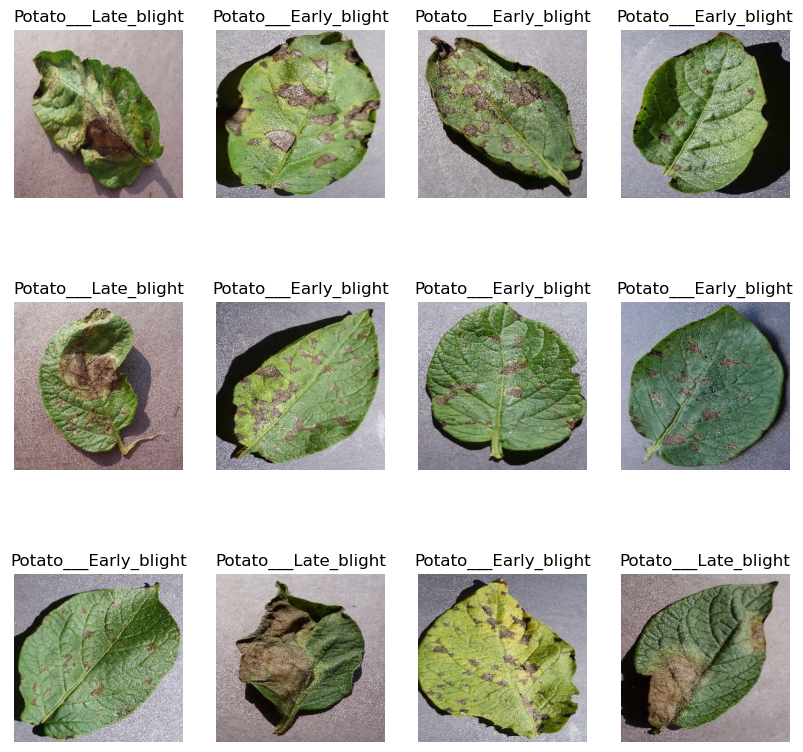

In [57]:
plt.figure(figsize=(10,10))
for image_batch,label in dataset.take(1).as_numpy_iterator():
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].astype('uint8'))
        plt.axis("off")
        plt.title(class_names[int(label[i])])

In [58]:
len(dataset)

68

In [59]:
train_size = len(dataset)*0.8
train_size

54.400000000000006

In [60]:
train_ds = dataset.take(54)
test_ds = dataset.skip(54)

In [62]:
len(train_ds)

54

In [63]:
len(test_ds)

14

In [64]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [65]:
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [67]:
len(val_ds)

6

In [66]:
len(dataset) == len(val_ds) + len(train_ds) + len(test_ds)

True

In [68]:
import math

In [77]:
def get_data_Partitions(ds, train_split=0.8,test_split=0.1,val_split=0.1,shuffle = True, shuffle_size=10000):

    if shuffle == True:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = math.floor(len(ds)*train_split)
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_size = math.floor(len(ds)*val_split)
    val_ds = test_ds.take(val_size)
    test_ds = test_ds.skip(val_size)
    
    

    return train_ds, test_ds,val_ds

In [78]:
train_ds, test_ds,val_ds = get_data_Partitions(dataset)

In [79]:
len(dataset) == len(train_ds)+ len(test_ds)+len(val_ds)

True

In [80]:
len(train_ds)

54

In [81]:
len(test_ds)

8

In [82]:
len(val_ds)

6

In [83]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [121]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Batch_size,Image_Size,Image_Size,3),
    layers.Rescaling(1.0/255),
])

In [122]:
data_augmentation = resize_and_rescale = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
]) 

# CNN Model

In [123]:
input_shape = (Batch_size,Image_Size,Image_Size,3)
model = keras.Sequential(
    [
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax'), 
]
)

In [124]:

model.build(input_shape=input_shape)

In [126]:
model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_25 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_25 (Sequential)      │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_117 (Conv2D)             │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_117               │ (32, 127, 127, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_118 (Conv2D)             │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_118               │ (32, 62, 62, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_119 (Conv2D)             │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_119               │ (32, 30, 30, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_120 (Conv2D)             │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_120               │ (32, 14, 14, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_121 (Conv2D)             │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_121               │ (32, 6, 6, 64)         │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_122 (Conv2D)             │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_122               │ (32, 2, 2, 64)         │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [128]:
history = model.fit(train_ds,epochs=20,batch_size=Batch_size,verbose=1,validation_data=val_ds)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 431ms/step - accuracy: 0.4393 - loss: 2.8255 - val_accuracy: 0.5781 - val_loss: 0.8407
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 382ms/step - accuracy: 0.6853 - loss: 0.7209 - val_accuracy: 0.7865 - val_loss: 0.5556
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 380ms/step - accuracy: 0.8148 - loss: 0.4126 - val_accuracy: 0.8802 - val_loss: 0.3740
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 382ms/step - accuracy: 0.9104 - loss: 0.2392 - val_accuracy: 0.9010 - val_loss: 0.3789
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 378ms/step - accuracy: 0.9280 - loss: 0.1812 - val_accuracy: 0.9115 - val_loss: 0.2249
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 392ms/step - accuracy: 0.9077 - loss: 0.2296 - val_accuracy: 0.9062 - val_loss: 0.2804
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 397ms/step - accuracy: 0.9117 - loss: 0.2033 - val_accuracy: 0.9219 - val_loss: 0.2316
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 385ms/step - accuracy: 0.9173 - loss: 0.2032 - val_accu

In [129]:
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9334 - loss: 0.1905


[0.15111368894577026, 0.9453125]

In [140]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [143]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

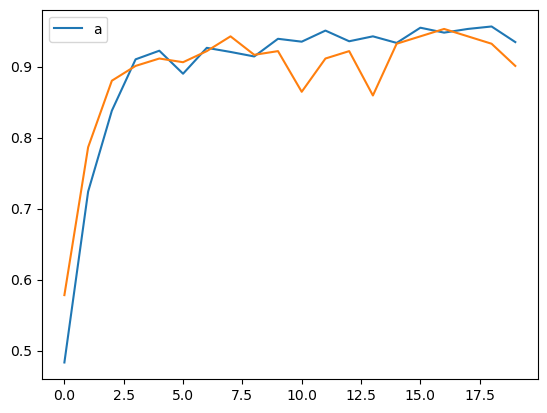

In [152]:
plt.plot(history.history['accuracy'])
plt.legend('accuracy')
plt.plot(history.history['val_accuracy'])
plt.show()

In [173]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


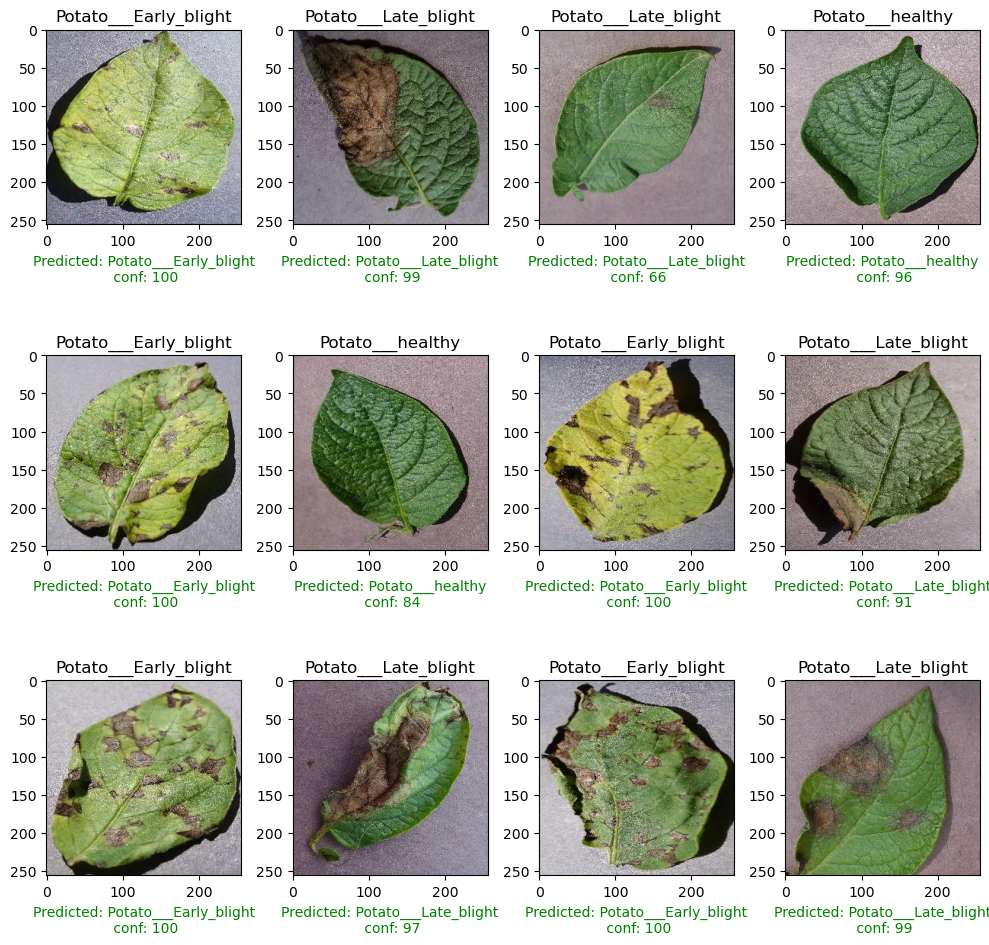

In [201]:
plt.figure(figsize=(10,10))
for image,label in test_ds.take(1).as_numpy_iterator():
    preds = model.predict(image)
    pred_classes = [np.argmax(i) for i in preds]
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.title(class_names[label[i]] )
        plt.imshow(image[i].astype('uint8'))
        if label[i]==pred_classes[i]:
            color = "Green"
        else:
            color = "Red"
            
        plt.xlabel("Predicted: "+class_names[pred_classes[i]]+"\n conf: "+str(round(100*np.max(preds[i]))), color=color)
    plt.tight_layout()



In [204]:
model_version = 1
model.save(f"../models/{model_version}.h5")

ValueError: Unable to synchronously create group (name already exists)